In [4]:
import pandas as pd
import numpy as np
from sktime.transformations.series.outlier_detection import HampelFilter
import matplotlib.pyplot as plt


In [5]:
filename_1d = "..\\..\\data\\moex\\SBER_200101_240530.csv"
filename_1h = "..\\..\\data\\moex\\SBER_240205_240603.csv"

dtype={
    '<TICKER>': 'string',
    '<PER>': 'string',
    '<DATE>': 'string',
    '<TIME>': 'string',
    '<OPEN>': 'float',
    '<HIGH>': 'float',
    '<LOW>': 'float',
    '<CLOSE>': 'float',
    '<VOLUME>': 'float',
}

df = pd.read_csv(filename_1d, delimiter=";", decimal=".", dtype=dtype)
df['timestamp'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], format='%y%m%d %H%M%S')
df.drop(['<DATE>', '<TIME>', '<PER>', '<TICKER>'], axis=1, inplace=True)
df.set_index('timestamp', inplace=True)
df.rename(columns= {'<OPEN>' : 'open', '<HIGH>' : 'high', '<LOW>' : 'low', '<CLOSE>' : 'close', '<VOL>' : 'volume'}, inplace=True)

df = df.loc[:, ['close']]
df["rtn"] = df.close.pct_change()
df["log_rtn"] = np.log(df.close/df.close.shift(1))

df.head()


,close,rtn,log_rtn
timestamp,,,
2020-01-03,255.00,NaN,NaN
2020-01-06,253.90,-0.004314,-0.004323
2020-01-08,259.15,0.020677,0.020467
2020-01-09,257.99,-0.004476,-0.004486
2020-01-10,258.19,0.000775,0.000775


In [6]:
hampel_detector = HampelFilter(window_length=10, return_bool=True)

df["outlier"] = hampel_detector.fit_transform(df["close"])

df.head()

,close,rtn,log_rtn,outlier
timestamp,,,,
2020-01-03,255.00,NaN,NaN,False
2020-01-06,253.90,-0.004314,-0.004323,False
2020-01-08,259.15,0.020677,0.020467,False
2020-01-09,257.99,-0.004476,-0.004486,False
2020-01-10,258.19,0.000775,0.000775,False


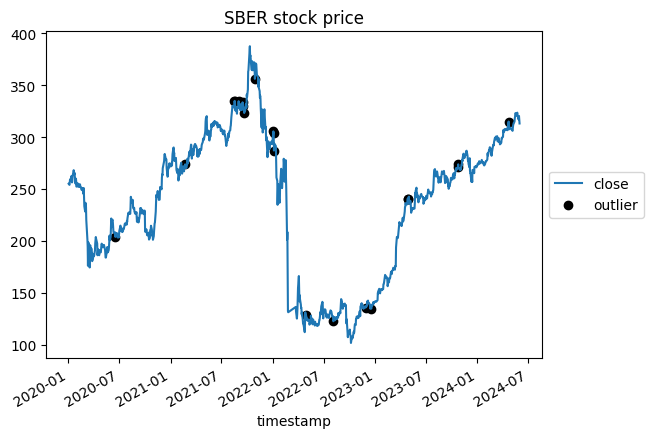

In [7]:
fig, ax = plt.subplots()
df[["close"]].plot(ax=ax)
ax.scatter(df.loc[df["outlier"]].index, df.loc[df["outlier"], "close"], color="black", label="outlier")
ax.set_title("SBER stock price")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()



C:\Users\Anatoly\Documents\GitHub\msu-data-analysis\.venv\Lib\site-packages\sktime\transformations\series\outlier_detection.py:103: UserWarning: Series contains nan values, more nan might be
                added if there are outliers
  Z = self._transform_series(Z)


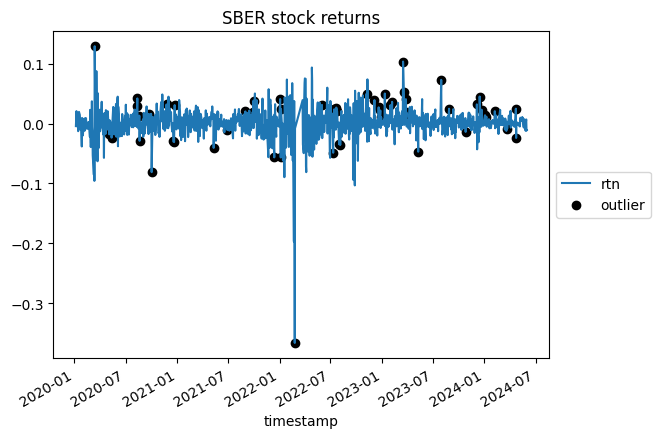

In [8]:
df["outlier_rtn"] = hampel_detector.fit_transform(df["rtn"])

fig, ax = plt.subplots()
df[["rtn"]].plot(ax=ax)
ax.scatter(df.loc[df["outlier_rtn"]].index, df.loc[df["outlier_rtn"], "rtn"], color="black", label="outlier")
ax.set_title("SBER stock returns")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


In [9]:
df.query("outlier == True and outlier_rtn == True")

,close,rtn,log_rtn,outlier,outlier_rtn
timestamp,,,,,
2021-09-01,334.57,0.020217,0.020015,True,True
2022-01-03,305.47,0.040819,0.040008,True,True
2022-01-05,287.01,-0.056633,-0.058300,True,True
2022-08-05,122.40,-0.035841,-0.036499,True,True
2024-04-22,314.99,0.024758,0.024456,True,True
